**Data Cleaning & Preprocessing**


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset
file_path = r'/content/drive/MyDrive/archive (3)/GlobalWeatherRepository.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display basic information and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58270 entries, 0 to 58269
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       58270 non-null  object 
 1   location_name                 58270 non-null  object 
 2   latitude                      58270 non-null  float64
 3   longitude                     58270 non-null  float64
 4   timezone                      58270 non-null  object 
 5   last_updated_epoch            58270 non-null  int64  
 6   last_updated                  58270 non-null  object 
 7   temperature_celsius           58270 non-null  float64
 8   temperature_fahrenheit        58270 non-null  float64
 9   condition_text                58270 non-null  object 
 10  wind_mph                      58270 non-null  float64
 11  wind_kph                      58270 non-null  float64
 12  wind_degree                   58270 non-null  int64  
 13  w

In [ ]:
# 1. Handling Missing Values
# Check missing values per column
print(df.isnull().sum())

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [ ]:
# Option 1: Drop columns with more than 50% missing data
df = df.dropna(thresh=len(df)*0.5, axis=1)

In [ ]:
# Option 2: Fill missing values
# For numeric columns - fill with median
df.fillna(df.median(numeric_only=True), inplace=True)
# For categorical columns - fill with mode
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-8-75df5c9ab38c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Validate missing values are handled
print(df.isnull().sum())

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

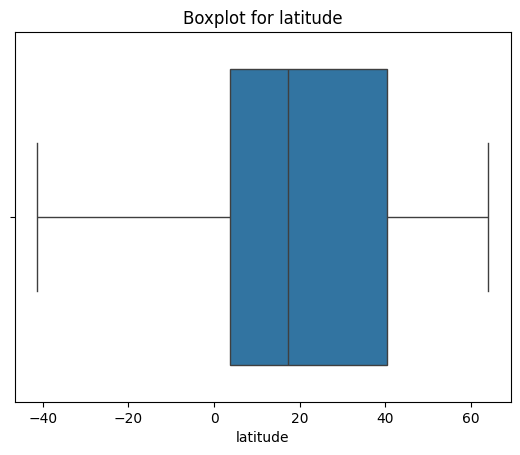

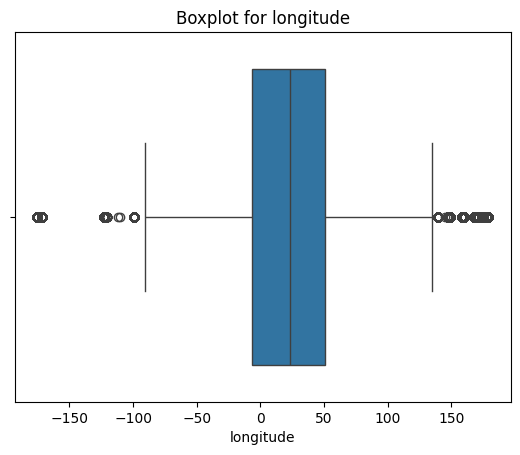

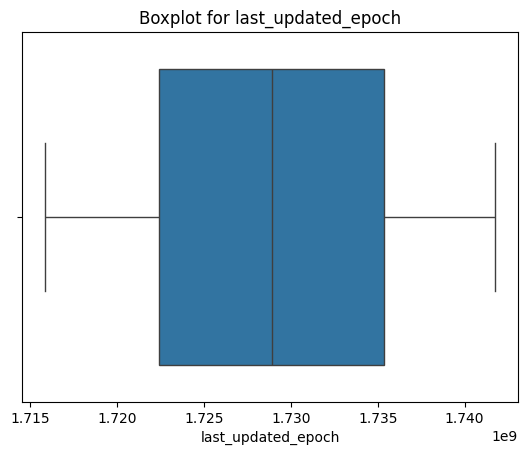

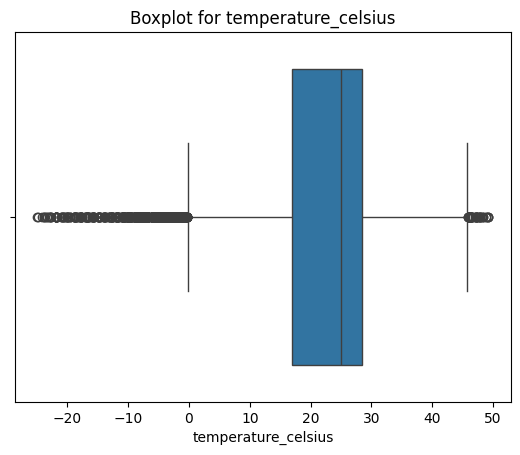

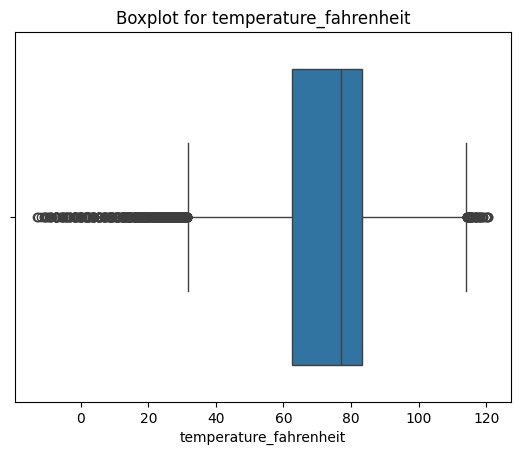

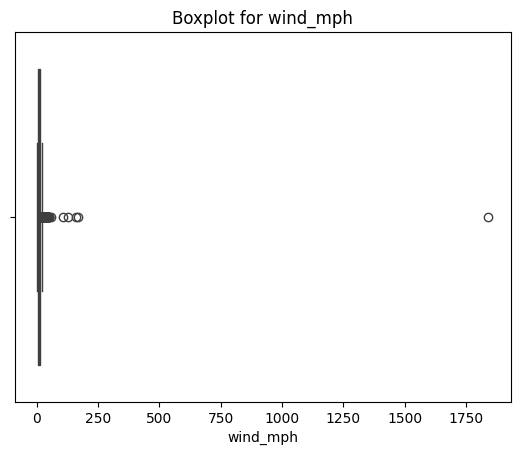

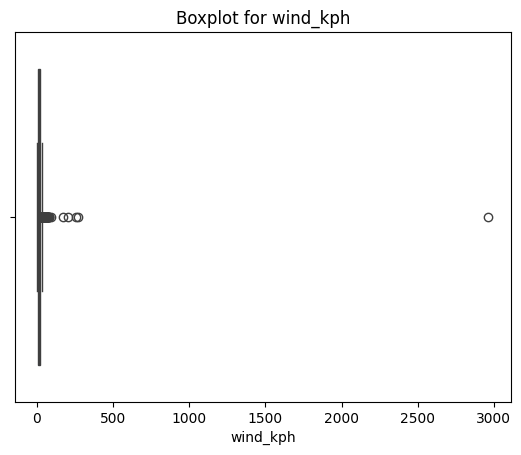

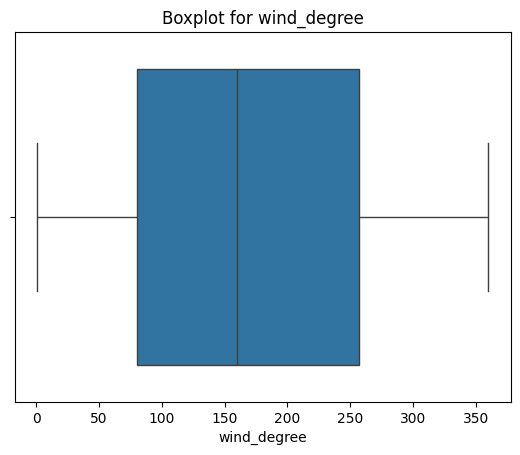

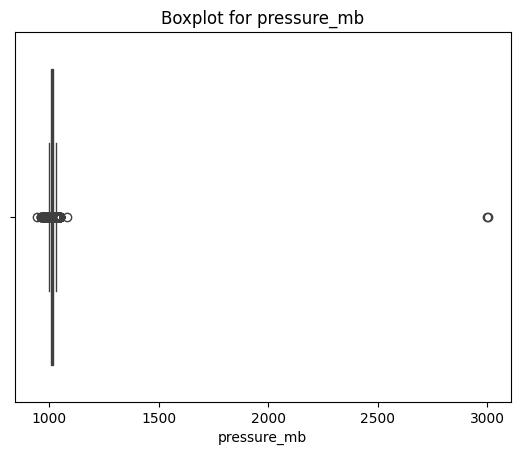

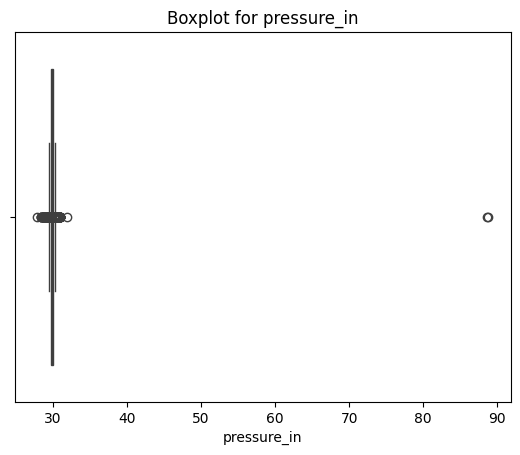

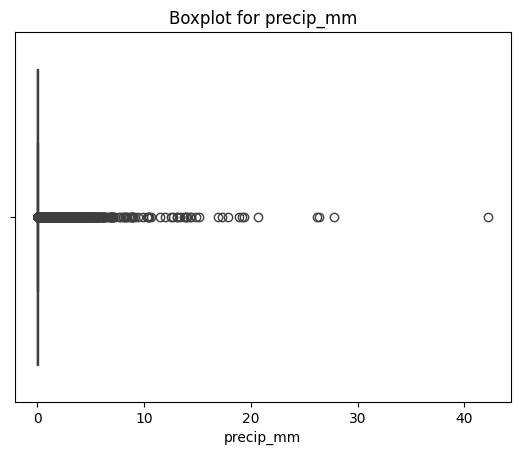

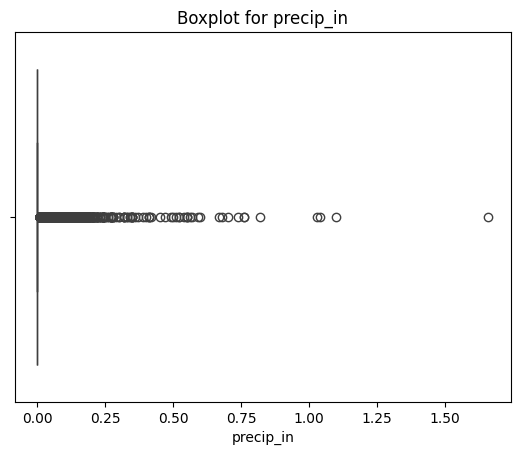

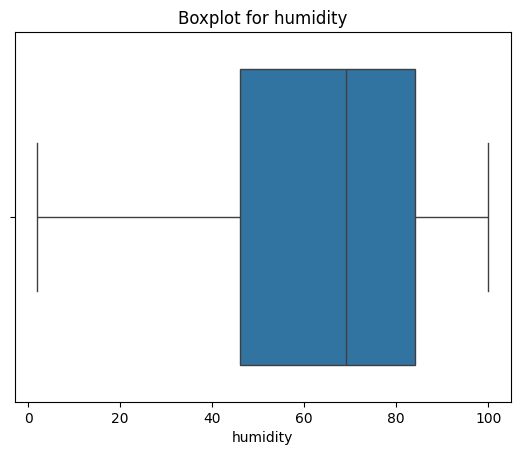

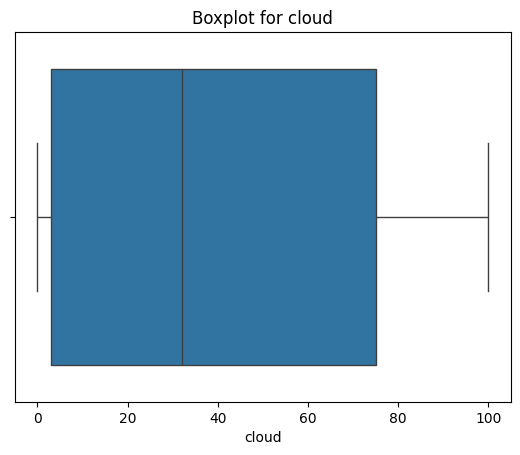

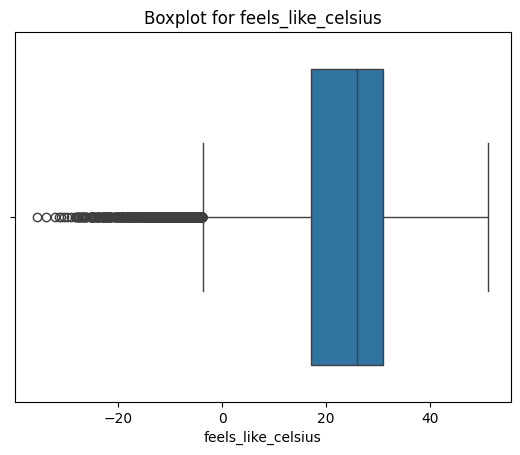

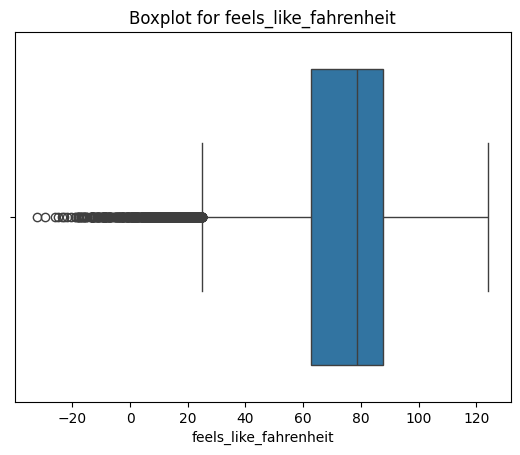

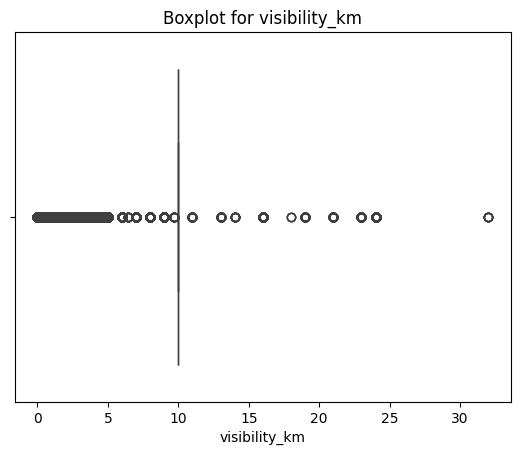

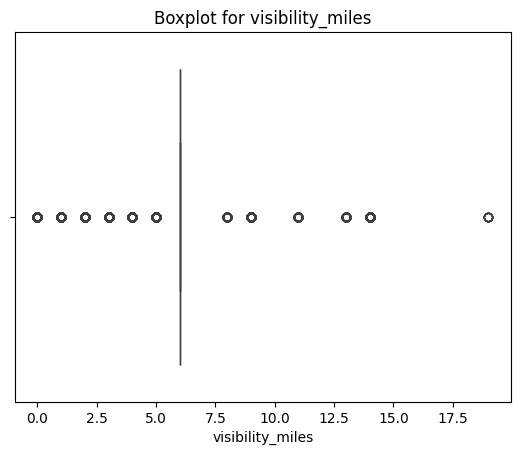

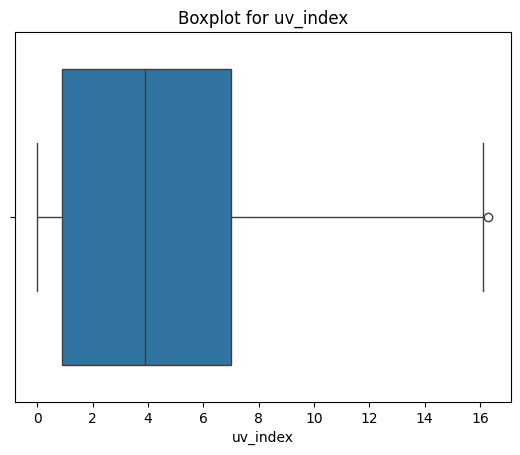

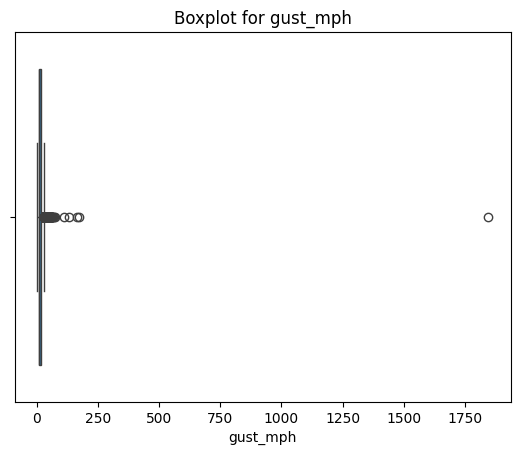

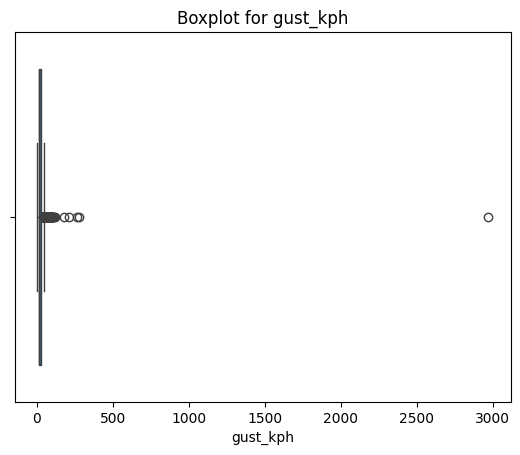

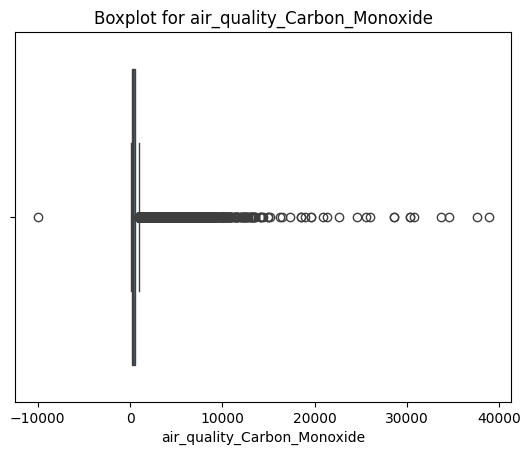

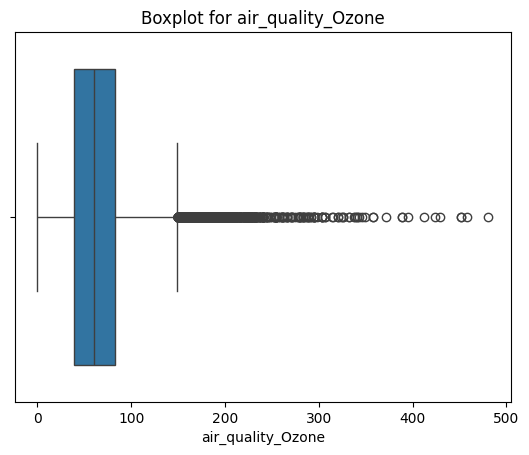

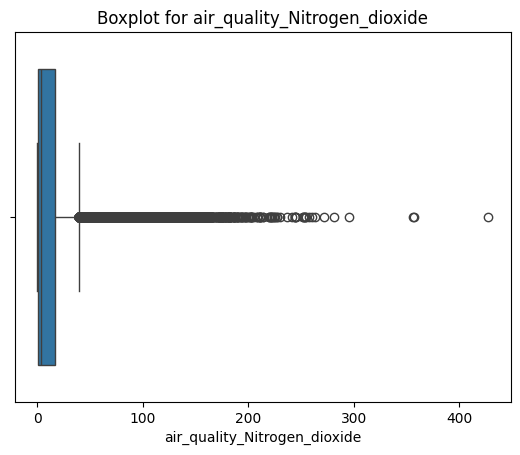

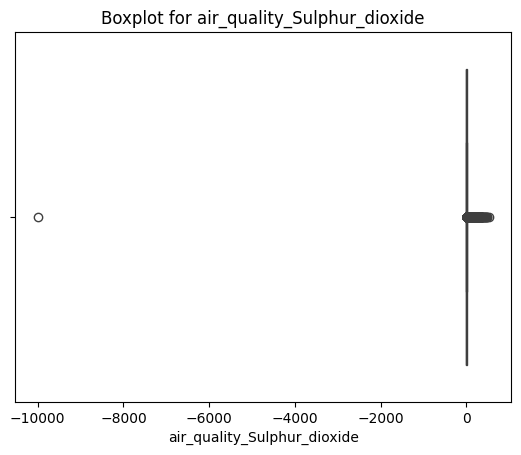

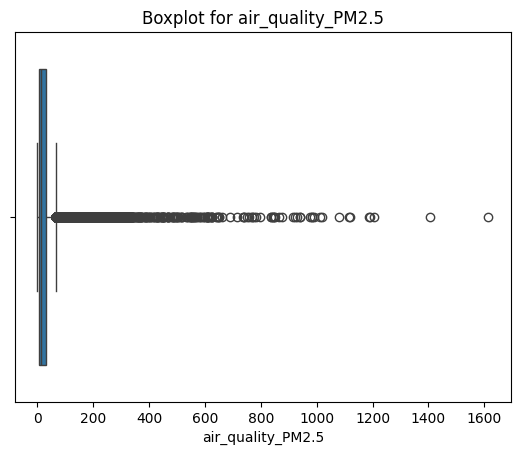

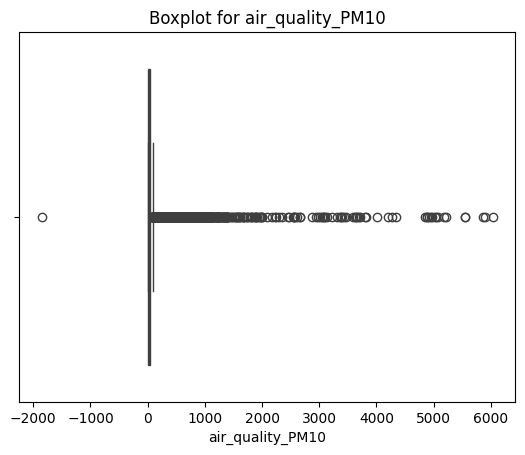

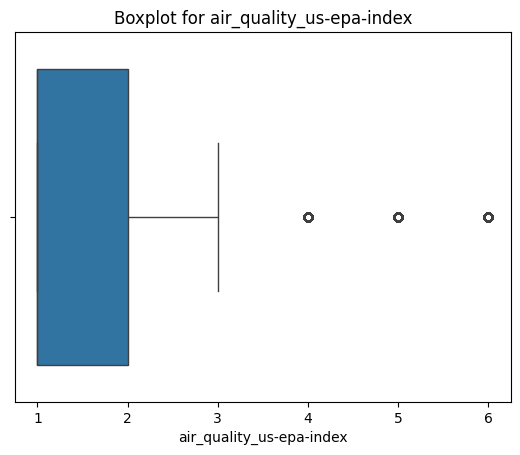

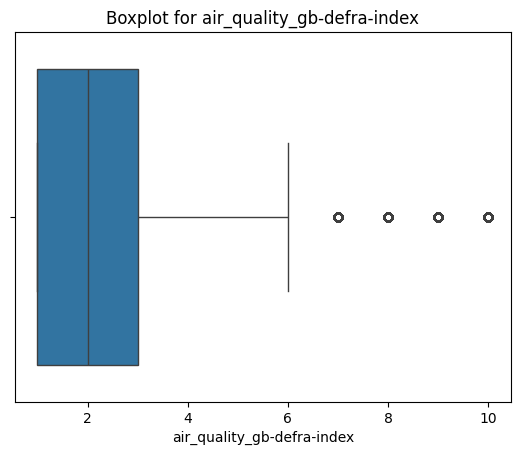

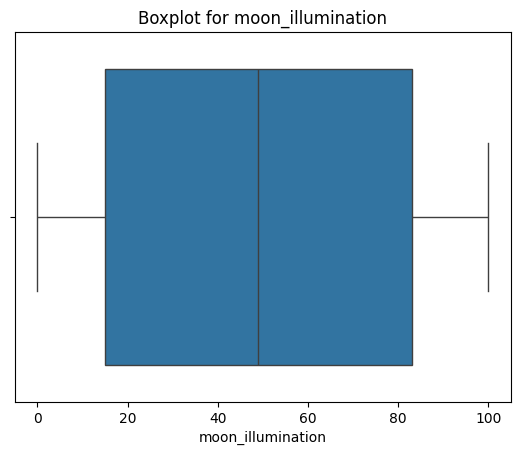

In [ ]:
# 2. Detect and Treat Outliers
# Visualize using boxplots
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
# Treat outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with median
    median = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])

In [ ]:
# 3. Normalize/Scale the Data
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# 4. Convert Date Columns
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

# Check for parsing errors
print(df['last_updated'].isnull().sum())

# Drop rows with invalid dates (if any)
df = df.dropna(subset=['last_updated'])

# Set 'last_updated' as the index for time-series analysis
df.set_index('last_updated', inplace=True)

# Confirm the change
print(df.info())
print(df.head())


0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58270 entries, 2024-05-16 13:15:00 to 2025-03-12 11:45:00
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       58270 non-null  object 
 1   location_name                 58270 non-null  object 
 2   latitude                      58270 non-null  float64
 3   longitude                     58270 non-null  float64
 4   timezone                      58270 non-null  object 
 5   last_updated_epoch            58270 non-null  float64
 6   temperature_celsius           58270 non-null  float64
 7   temperature_fahrenheit        58270 non-null  float64
 8   condition_text                58270 non-null  object 
 9   wind_mph                      58270 non-null  float64
 10  wind_kph                      58270 non-null  float64
 11  wind_degree                   58270 non-null  float64
 12  wind_direction         

**Exploratory Data Analysis (EDA)**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Basic Data Overview
print(df.describe())

           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  58270.000000  58270.000000        58270.000000         58270.000000   
mean       0.573125      0.480582            0.500906             0.502532   
std        0.232119      0.226648            0.290456             0.189051   
min        0.000000      0.000000            0.000000             0.000000   
25%        0.427217      0.401214            0.253784             0.398693   
50%        0.555239      0.505775            0.503368             0.549020   
75%        0.774775      0.598564            0.753437             0.623094   
max        1.000000      1.000000            1.000000             1.000000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            58270.000000  58270.000000  58270.000000  58270.000000   
mean                 0.503149      0.284908      0.284193      0.468861   
std                  0.189408      0.236866      0.237536      0.288723 

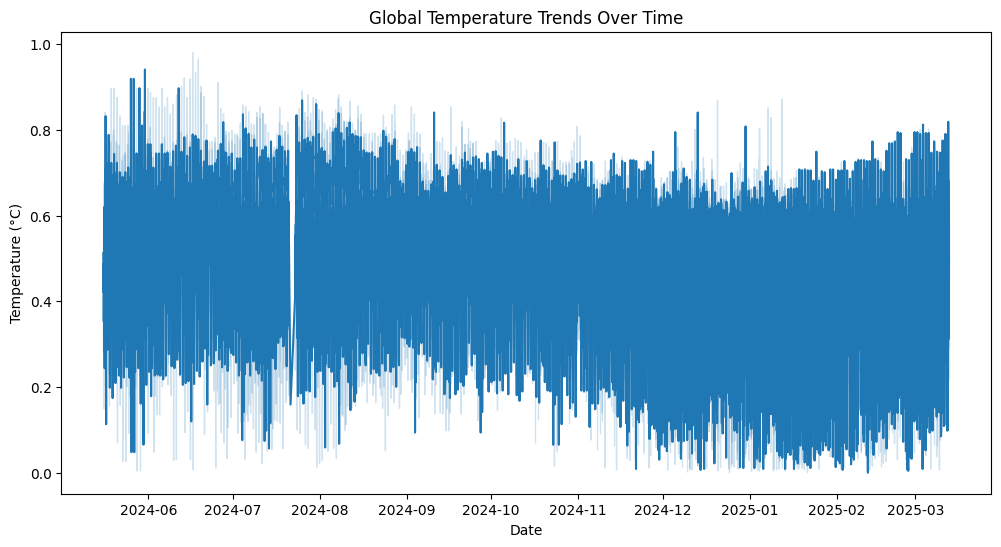

In [ ]:
# 2. Visualizing Temperature Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='temperature_celsius', data=df)
plt.title('Global Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

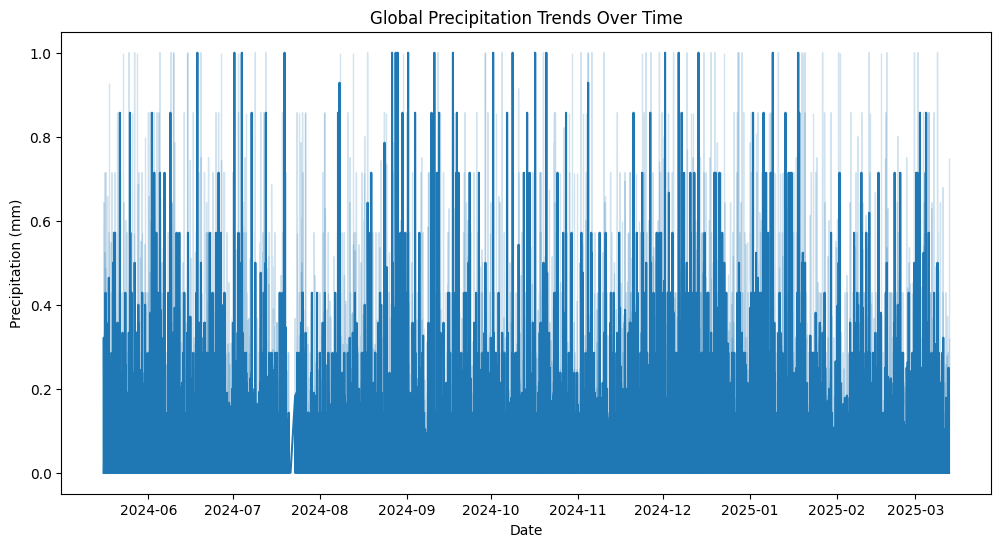

In [ ]:
# 3. Visualizing Precipitation Trends Over Time
# ----------------------------
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='precip_mm', data=df)
plt.title('Global Precipitation Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

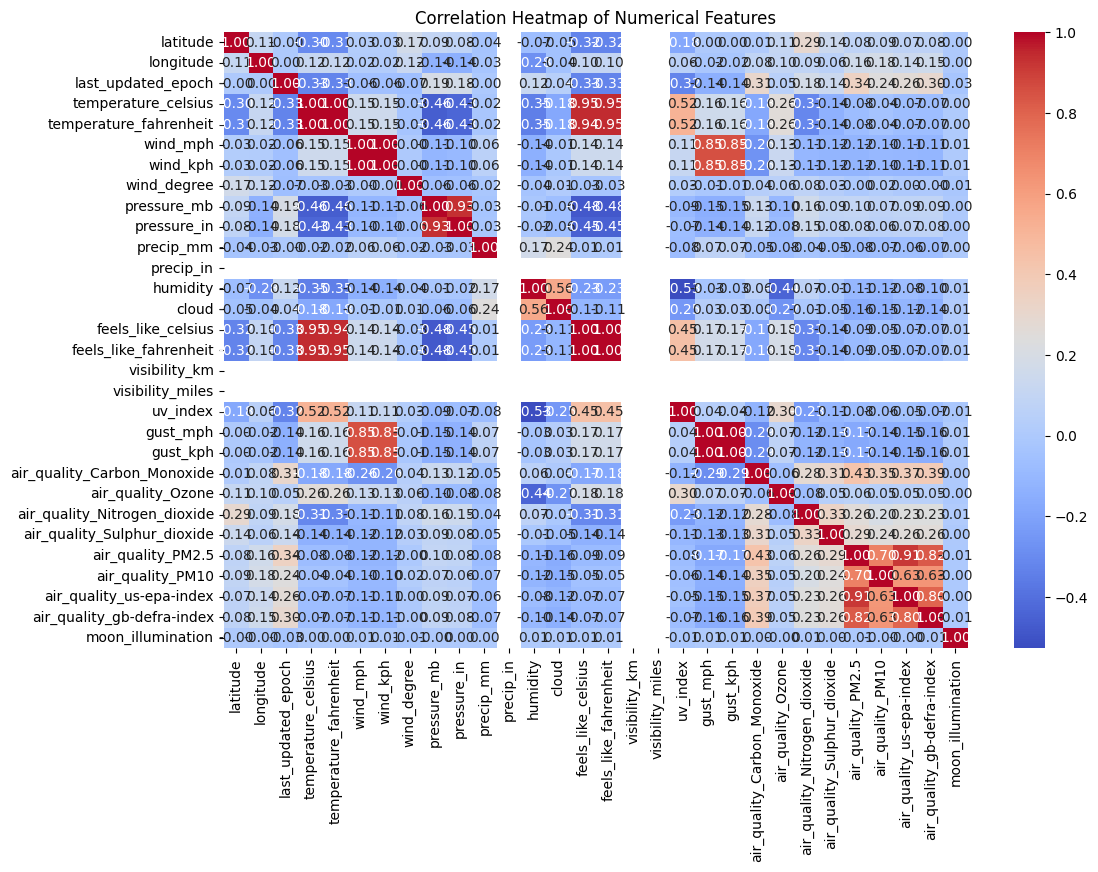

In [ ]:
# 4. Correlation Heatmap
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


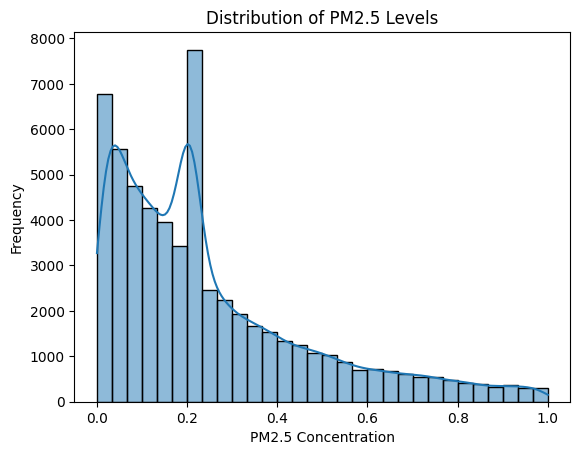

In [ ]:
# 5. Distribution of Air Quality Index (PM2.5)
sns.histplot(df['air_quality_PM2.5'], bins=30, kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


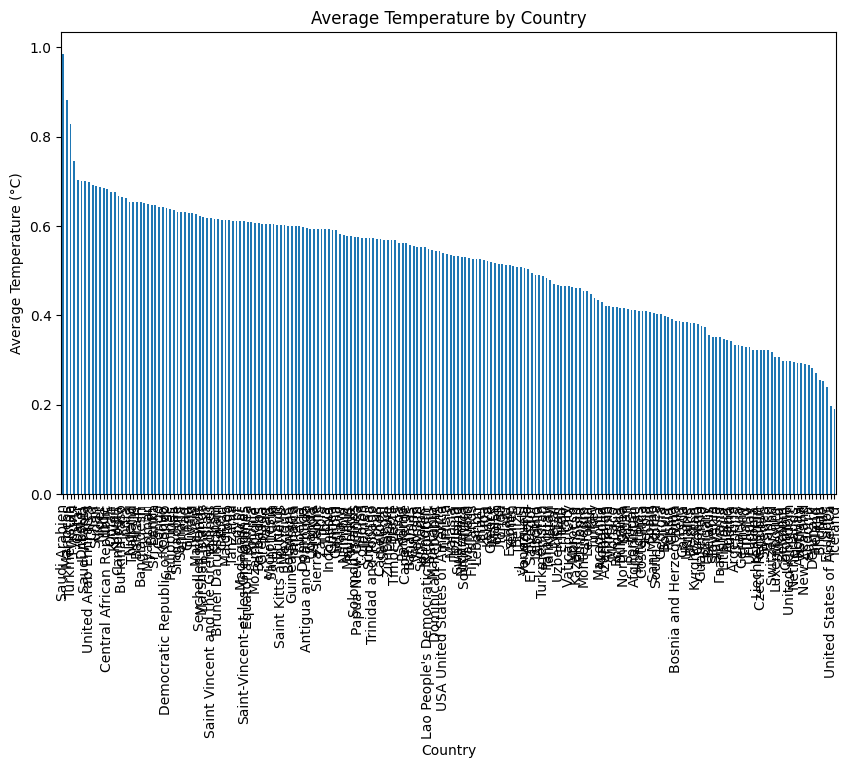

In [ ]:
# 6. Average Temperature by Country
avg_temp = df.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg_temp.plot(kind='bar')
plt.title('Average Temperature by Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.show()

**Model Building (Time Series Forecasting)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# 1. Prepare Data for Forecasting
# Convert 'last_updated' to datetime
if not isinstance(df.index, pd.DatetimeIndex):
    df.reset_index(inplace=True)

# Convert index to datetime if it's 'last_updated'
df.index = pd.to_datetime(df.index, errors='coerce')

# Verify the index type
print(df.index)


DatetimeIndex(['2024-05-16 13:15:00', '2024-05-16 10:45:00',
               '2024-05-16 09:45:00', '2024-05-16 10:45:00',
               '2024-05-16 09:45:00', '2024-05-16 04:45:00',
               '2024-05-16 05:45:00', '2024-05-16 12:45:00',
               '2024-05-16 18:45:00', '2024-05-16 10:45:00',
               ...
               '2025-03-12 09:45:00', '2025-03-12 02:45:00',
               '2025-03-12 06:45:00', '2025-03-12 14:45:00',
               '2025-03-12 20:45:00', '2025-03-12 05:45:00',
               '2025-03-12 16:45:00', '2025-03-12 12:45:00',
               '2025-03-12 11:45:00', '2025-03-12 11:45:00'],
              dtype='datetime64[ns]', name='last_updated', length=58270, freq=None)


In [ ]:
df_daily = df['temperature_celsius'].resample('D').mean().fillna(method='ffill')

<ipython-input-29-37688d07ab05>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily = df['temperature_celsius'].resample('D').mean().fillna(method='ffill')


In [ ]:
# 2. Train-Test Split
split = int(len(df_daily) * 0.8)
train, test = df_daily[:split], df_daily[split:]

In [ ]:
# 3. Build ARIMA Model
model = ARIMA(train, order=(5, 1, 0))  # (p,d,q) values
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

In [ ]:
# 4. Evaluate the Model
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.014422413014538551
MSE: 0.0003471952038090784
RMSE: 0.01863317481829327


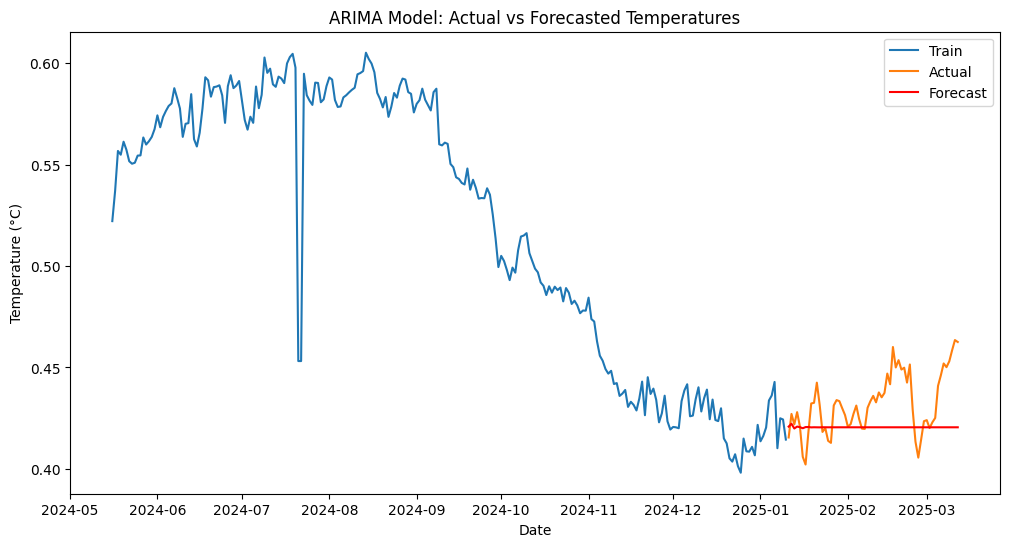

In [ ]:
# 5. Visualize Actual vs Forecasted
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Model: Actual vs Forecasted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Select the Target Variable (Temperature) and Resample
df_temp = df[['temperature_celsius']].resample('D').mean()

# Fill missing dates with interpolation (if any)
df_temp = df_temp.interpolate()

In [ ]:
# 2. Split Data into Training and Testing Sets
split_ratio = 0.8
split_index = int(len(df_temp) * split_ratio)
train = df_temp.iloc[:split_index]
test = df_temp.iloc[split_index:]

In [ ]:
# 3. Build the Simple Exponential Smoothing (SES) Model
model = ExponentialSmoothing(train['temperature_celsius'], trend='add', seasonal=None).fit()

# Forecasting
forecast = model.forecast(len(test))

In [ ]:
# 4. Evaluate the Model
mae = mean_absolute_error(test['temperature_celsius'], forecast)
rmse = np.sqrt(mean_squared_error(test['temperature_celsius'], forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.03
Root Mean Squared Error (RMSE): 0.04


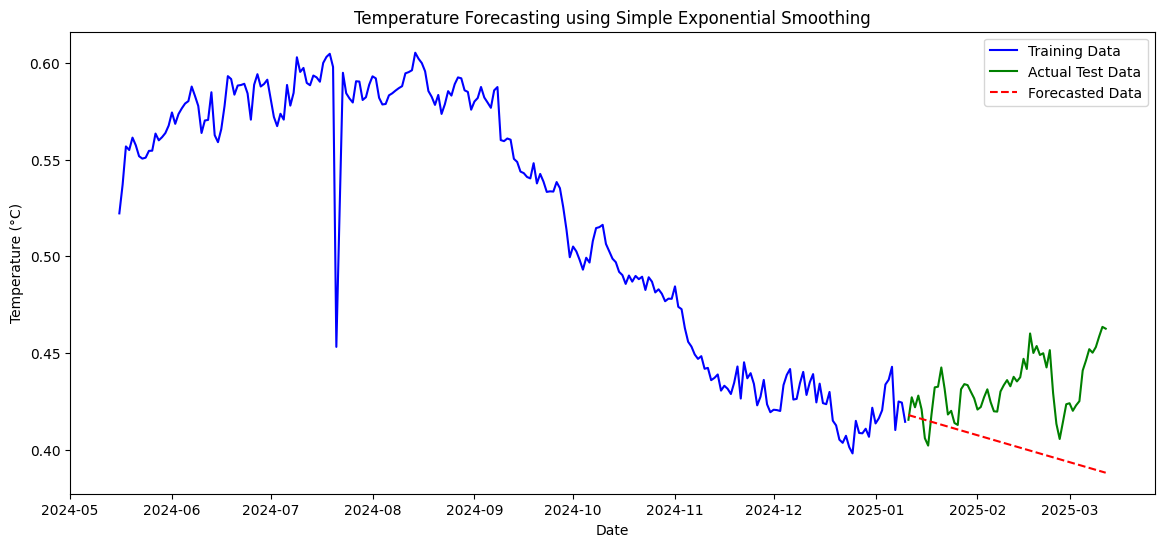

In [ ]:
# 5. Visualize Actual vs Forecasted Values
# --------------------------------------------------------
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['temperature_celsius'], label='Training Data', color='blue')
plt.plot(test.index, test['temperature_celsius'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='Forecasted Data', color='red', linestyle='--')
plt.title('Temperature Forecasting using Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

**Advanced Forecasting (Multiple Models & Ensemble)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare Data for Prophet (requires specific format)
df_prophet = df_temp.reset_index()
df_prophet.columns = ['ds', 'y']

# Split Data
train_prophet = df_prophet.iloc[:split_index]
test_prophet = df_prophet.iloc[split_index:]

In [ ]:
# Model 1: Exponential Smoothing
model_es = ExponentialSmoothing(train['temperature_celsius'], trend='add').fit()
forecast_es = model_es.forecast(len(test))

In [ ]:
# Model 2: ARIMA
model_arima = ARIMA(train['temperature_celsius'], order=(5, 1, 0)).fit()
forecast_arima = model_arima.forecast(steps=len(test))

In [ ]:
# Model 3: Prophet
model_prophet = Prophet()
model_prophet.fit(train_prophet)
future = model_prophet.make_future_dataframe(periods=len(test), freq='D')
forecast_prophet = model_prophet.predict(future)['yhat'].iloc[-len(test):].values

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr65r_t3p/2q4ymuqc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr65r_t3p/9jys5usd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84769', 'data', 'file=/tmp/tmpr65r_t3p/2q4ymuqc.json', 'init=/tmp/tmpr65r_t3p/9jys5usd.json', 'output', 'file=/tmp/tmpr65r_t3p/prophet_model4p_bd5e8/prophet_model-20250312155617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Ensemble Model (Averaging Forecasts)
ensemble_forecast = (forecast_es.values + forecast_arima.values + forecast_prophet) / 3

In [ ]:
# Evaluate Models
def evaluate(true, pred, model_name):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate(test['temperature_celsius'], forecast_es, "Exponential Smoothing")
evaluate(test['temperature_celsius'], forecast_arima, "ARIMA")
evaluate(test['temperature_celsius'], forecast_prophet, "Prophet")
evaluate(test['temperature_celsius'], ensemble_forecast, "Ensemble Model")

Exponential Smoothing - MAE: 0.03, RMSE: 0.04
ARIMA - MAE: 0.02, RMSE: 0.02
Prophet - MAE: 0.03, RMSE: 0.04
Ensemble Model - MAE: 0.03, RMSE: 0.03


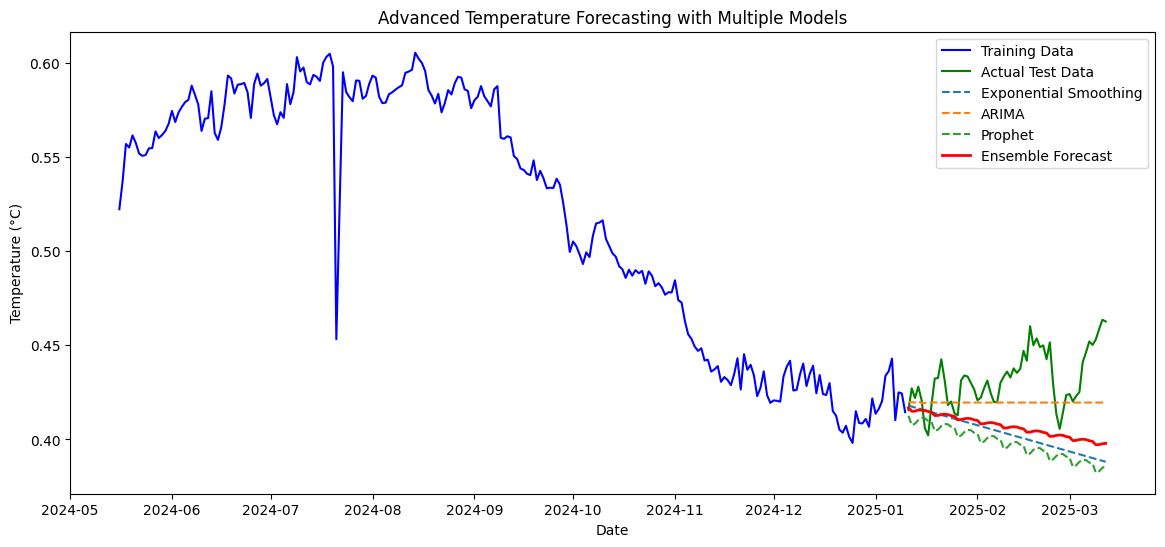

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['temperature_celsius'], label='Training Data', color='blue')
plt.plot(test.index, test['temperature_celsius'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast_es, label='Exponential Smoothing', linestyle='--')
plt.plot(test.index, forecast_arima, label='ARIMA', linestyle='--')
plt.plot(test.index, forecast_prophet, label='Prophet', linestyle='--')
plt.plot(test.index, ensemble_forecast, label='Ensemble Forecast', color='red', linewidth=2)
plt.title('Advanced Temperature Forecasting with Multiple Models')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

**Unique & Advanced Analyses**

In [ ]:
print("Feature Importances:", importances)


Feature Importances: [2.27582143e-05 1.85196981e-05 2.01791975e-05 3.98959643e-05
 9.96283009e-01 2.08195693e-05 1.66021044e-05 8.45789659e-05
 4.35849077e-05 7.39944140e-05 5.94417518e-08 0.00000000e+00
 1.30206399e-04 2.71181090e-05 2.23497972e-03 4.49773866e-04
 0.00000000e+00 0.00000000e+00 3.34232962e-05 6.15163311e-05
 5.60104125e-05 5.36904478e-05 5.52210380e-05 5.44590552e-05
 3.64371402e-05 5.25392530e-05 3.92534551e-05 1.52336389e-05
 1.93017966e-05 5.68343755e-05]


✅ Features Shape: (58270, 30)
✅ Feature Columns: ['country', 'latitude', 'longitude', 'last_updated_epoch', 'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination']
Feature Importances: [2.27582143e-05 1.85196981e-05 2.01791975e-05 3.98959643e-05
 9.96283009e-01 2.08195693e-05 1.66021044e-05 8.45789659e-05
 4.35849077e-05 7.39944140e-05 5.94417518e-08 0.00000000e+00
 1.30206399e-04 2.71181090e-05 2.23497972e-03 4.49773866e-04
 0.00000000e+00 0.00000000e+00 3.34232962e-05 6.15163311e-05
 5.60104125e-05 5.36904478e-05 5.52210380e-05 5.44590552e-05
 3.64371

<ipython-input-50-9be24b81bc80>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


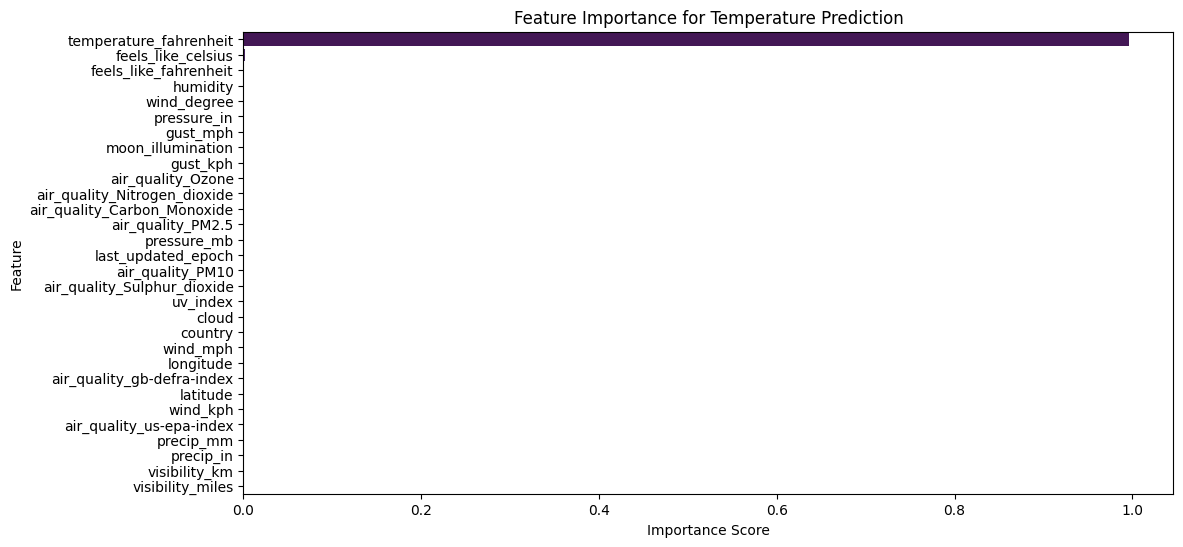

In [ ]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------
# 1. Feature Importance Analysis
# --------------------------------

# Confirm columns to drop (only if they exist)
cols_to_drop = [col for col in ['location_name', 'timezone'] if col in df.columns]
features = df.drop(columns=cols_to_drop)

# Encode categorical features
if 'country' in features.columns:
    features['country'] = LabelEncoder().fit_transform(features['country'])

# Define target and features (ensure 'temperature_celsius' exists)
if 'temperature_celsius' in features.columns:
    X = features.drop('temperature_celsius', axis=1)
    y = features['temperature_celsius']
else:
    print("❌ 'temperature_celsius' column not found!")

# Ensure all features are numeric
X = X.select_dtypes(include=[np.number])

# Debug: Check the data
print("✅ Features Shape:", X.shape)
print("✅ Feature Columns:", X.columns.tolist())

# Check if X is empty
if X.empty:
    print("❌ No numeric features found for model training.")
else:
    # Random Forest for Feature Importance
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Extract feature importances
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X.columns

    # Debug: Print importances
    print("Feature Importances:", importances)

    # Check if importances are non-zero
    if np.all(importances == 0):
        print("All feature importances are zero. Check feature relevance or model parameters.")
    else:
        # Plotting feature importance
        plt.figure(figsize=(12, 6))
        sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
        plt.title('Feature Importance for Temperature Prediction')
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.show()


In [ ]:
# 2. Spatial Analysis using Folium
# Create a Folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add temperature markers
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"{row['location_name']}: {row['temperature_celsius']}°C",
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

# Save and display map
m.save("temperature_map.html")
print("Temperature distribution map saved as 'temperature_map.html'.")

Temperature distribution map saved as 'temperature_map.html'.


In [ ]:
for i in indices[:5]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


temperature_fahrenheit: 0.9963
feels_like_celsius: 0.0022
feels_like_fahrenheit: 0.0004
humidity: 0.0001
wind_degree: 0.0001


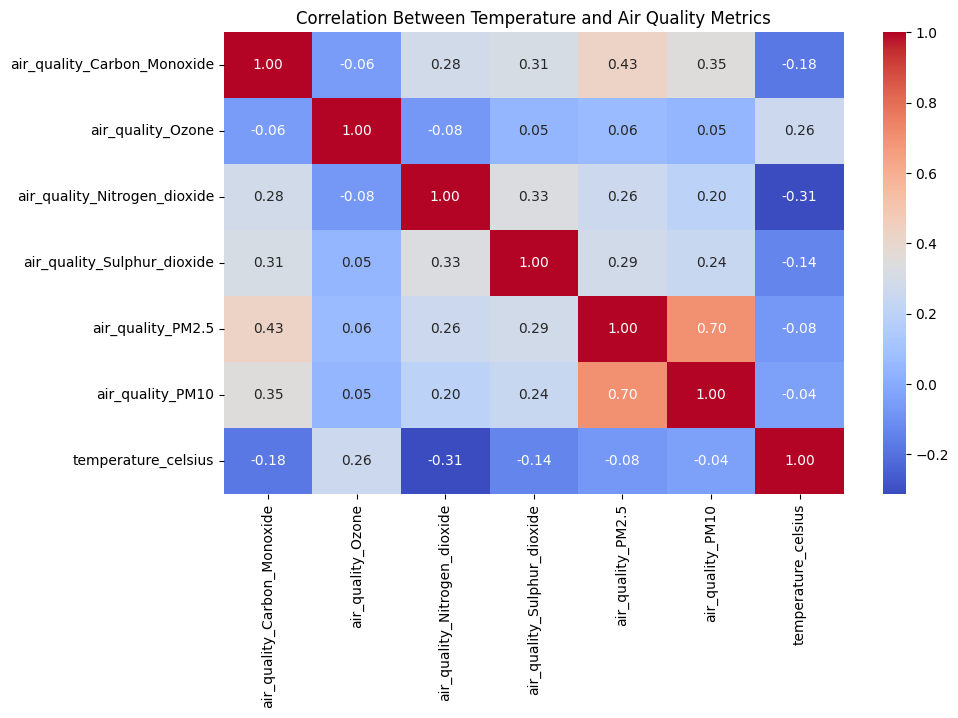

In [ ]:
# 3. Environmental Impact Analysis
# Correlation between temperature and air quality
air_quality_cols = [
    'air_quality_Carbon_Monoxide',
    'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide',
    'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5',
    'air_quality_PM10'
]

corr_env = df[air_quality_cols + ['temperature_celsius']].corr()

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_env, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Temperature and Air Quality Metrics')
plt.show()

**Results & Visualization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --------------------------------
# 1. Model Evaluation
# --------------------------------
# Predict using the trained model
y_pred = rf.predict(X)

# Calculate evaluation metrics
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Model Performance Metrics:")

print(f"R² Score: {r2:.2f}")

Model Performance Metrics:
R² Score: 1.00


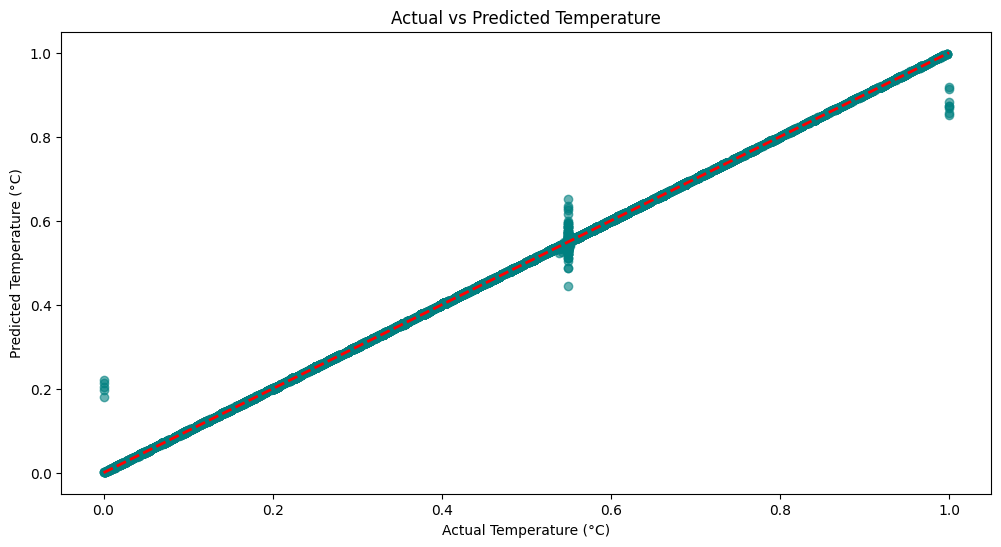

In [ ]:
# 2. Prediction Visualization
plt.figure(figsize=(12, 6))
plt.scatter(y, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [ ]:
# 3. Saving Results
# Save predictions to a CSV
df_results = pd.DataFrame({
    'Actual_Temperature': y,
    'Predicted_Temperature': y_pred
})
df_results.to_csv('temperature_predictions.csv', index=False)
print("Predictions saved to 'temperature_predictions.csv'.")

Predictions saved to 'temperature_predictions.csv'.
